<img align="left" src = https://project.lsst.org/sites/default/files/Rubin-O-Logo_0.png width=250 style="padding: 10px"> 
<b>Getting opsim run and summary metric data</b> <br>
Contact authors: Eric Neilsen, Lynne Jones, Peter Yoachim<br>
Questions welcome at <a href="https://community.lsst.org/c/sci/survey-strategy">community.lsst.org/c/sci/survey-strategy</a> and the <a href="https://lsstc.slack.com/archives/C2LTWTP5J">#sims_operations</a> slack channel.<br>
Find additional MAF documentation and resources at <a href="https://rubin-sim.lsst.io">rubin-sim.lsst.io</a>. <br>

**Credit:** Stylistic elements of these notebooks were guided by the DP0.1 notebooks developed by Melissa Graham and the Rubin Observatory Community Engagement Team.

## 1 Basic concepts

The Rubin Observatory Survey Strategy Team is producing an extensive collection of survey strategy simulations (using `opsim`) and corresponding analysis (using `MAF`). Many of these are of interest for science collaborations, and are publicly available. One interface to this data is [interactive web page](http://astro-lsst-01.astro.washington.edu:8081/) with lists of simulation runs and links ot `opsim` configuration and output files (databases of scheduled visits with simulated data quality) and output of `MAF` including summary values and plots:

- http://astro-lsst-01.astro.washington.edu:8080/
    
A programmatic interface to this data is also sometimes helpful. The `rubin_sim.maf.archive` module provides such an interface.

Survey strategy executions and analysis are assigned names and collected into groups for easy management and reference, according to the following nomenclature:

| term | discussion |
|------|------------|
| run | A **run** is a single execution of `opsim`. Each run produces an SQLite database of visits with data describing each visit (e.g. the start time, filter used, simulated seeing, etc.). Each `run` has a canonical "run name". Examples include `baseline_nexp2_v1.7.1_10yrs`, `barebones_nexp2_v1.6_10yrs`, and `combo_dust_nexp2_v1.6_10yrs`.|
| family | The survey strategy team often produces collections of runs designed to explore a specific aspect of survey strategy. Different runs in a collection vary the aspect of survey strategy being studied, while keeping other aspects the same. Comparing runs that are part of the same collection or **family** therefore supports exploring the effects of varying a specific parameter or other scheduler feature. Other collections for which direct comparison might be useful can also sometimes be grouped into the same family. Examples include the `version_baselines` famile, which include simulations that have been used as "baselines" at different points in time; and `potential_schedulers`, which are runs that appeared to be good candidates using the `FBS_1.6` version of `opsim`. |
| summary metric | A **summary metric** is a single scalar representing some feature of an `opsim` run, generally one that indicates some aspect of the quality of the survey. Each `MAF` metric may produce any number of summary metrics, and each execution of MAF may construct an arbitrary number of summary metrics, depending on the MAF metric bundles executed. Each summary metric has a cannonical name derived from various elements of the metric bundle. |
| summary metric sets | Standard executions of MAF on opsim runs produce thousands of summary metrics, and users will only wish to inspect and compare limited subsets of these summary metrics at any given time. The survey strategy team has therefore pre-defined a collection of named sets of metrics, so that sets of metrics usefully examined as a group can be referenced together. Examples of summary metric sets include `srd` (which correspond to requirement in the Science Requirements Document), `Nvis` (which counts visits of different types), `tvs` (summary metrics of interest to the transients and variable stars working group), `descWFD` (summary metrics of interest to DESC analysis of the WFD survey), and more. | 

## 2 Notebook preparation

The following is a development style aid; only uncomment if developing the notebook:

In [1]:
%load_ext nb_black
%load_ext pycodestyle_magic
%flake8_on --ignore E501,W505

<IPython.core.display.Javascript object>

Required imports:

In [2]:
from rubin_sim import maf
from rubin_sim.maf.runComparison import archive

<IPython.core.display.Javascript object>

## 3 Run families

The "families" json file organizes `opsim` runs into "families," groups of runs that vary in a controlled way, and which are approprate for direct comparison with each other in order to understand the effects of varying specific parameters, or making specific alterations to survey strategy.

You can download a table of families, their descriptions, and definitions into a `pandas.DataFrame` thus:

In [3]:
families = maf.get_family_descriptions()
families

,description,version,reference,run,brief,filepath,url
family,,,,,,,
baseline,**baseline** : The v2 baseline simulations. V2...,--,baseline_v2.1_10yrs,"[baseline_v2.1_10yrs, baseline_v2.0_10yrs, bas...","[v2.1 baseline (+Virgo, good seeing), v2.0 bas...","[fbs_2.1/baseline/baseline_v2.1_10yrs.db, fbs_...",[http://epyc.astro.washington.edu/~lynnej/opsi...
rolling,**rolling** : The rolling family covers a wide...,2.0,baseline_v2.0_10yrs,"[noroll_v2.0_10yrs, rolling_ns2_rw0.5_v2.0_10y...","[v2.0 baseline with no rolling, Rolling half-s...","[fbs_2.0/noroll/noroll_v2.0_10yrs.db, fbs_2.0/...",[http://epyc.astro.washington.edu/~lynnej/opsi...
triplets,**triplets** : These simulations add a third v...,2.0,baseline_v2.0_10yrs,"[presto_gap1.5_v2.0_10yrs, presto_gap2.0_v2.0_...","[Triples spaced 1.5 hours apart g+r,r+i,i+z in...","[fbs_2.0/presto/presto_gap1.5_v2.0_10yrs.db, f...",[http://epyc.astro.washington.edu/~lynnej/opsi...
long gaps no pairs,**long gaps no pairs** : The baseline survey s...,2.0,baseline_v2.0_10yrs,[long_gaps_np_nightsoff7_delayed1827_v2.0_10yr...,[Long gaps pairs every 7 nights starting after...,[fbs_2.0/long_gaps_nopair/long_gaps_np_nightso...,[http://epyc.astro.washington.edu/~lynnej/opsi...
bluer balance,**bluer balance** : The standard filter balanc...,2.0,baseline_v2.0_10yrs,"[bluer_indx0_v2.0_10yrs, bluer_indx1_v2.0_10yrs]","[More g - filter ratio in WFD of {'u': 0.07, '...","[fbs_2.0/bluer/bluer_indx0_v2.0_10yrs.db, fbs_...",[http://epyc.astro.washington.edu/~lynnej/opsi...
longer u visits,**longer u visits** : The baseline survey uses...,2.0,baseline_v2.0_10yrs,"[long_u1_v2.0_10yrs, long_u2_v2.0_10yrs]","[u band visits 1x50s, number of u visits same ...","[fbs_2.0/long_u/long_u1_v2.0_10yrs.db, fbs_2.0...",[http://epyc.astro.washington.edu/~lynnej/opsi...
vary nes,**vary nes** : These simulations investigate t...,2.0,baseline_v2.0_10yrs,"[vary_nes_nesfrac0.01_v2.0_10yrs, vary_nes_nes...","[NES at 1% WFD level, NES at 5% WFD level, NES...",[fbs_2.0/vary_nes/vary_nes_nesfrac0.01_v2.0_10...,[http://epyc.astro.washington.edu/~lynnej/opsi...
vary gp,**vary gp** : These simulations investigate th...,2.0,baseline_v2.0_10yrs,"[vary_gp_gpfrac0.01_v2.0_10yrs, vary_gp_gpfrac...","[Dusty plane at 1% WFD level, Dusty plane at 5...",[fbs_2.0/vary_gp/vary_gp_gpfrac0.01_v2.0_10yrs...,[http://epyc.astro.washington.edu/~lynnej/opsi...
galactic plane footprint,**galactic plane footprint** : These simulatio...,2.1,baseline_v2.1_10yrs,"[plane_priority_priority1.2_pbf_v2.1_10yrs, pl...",[Select galactic plane priority map above 1.2 ...,[fbs_2.1/footprints/plane_priority_priority1.2...,[http://epyc.astro.washington.edu/~lynnej/opsi...


<IPython.core.display.Javascript object>

By default, `get_family_descriptions` retrives the runs data from a json file at the URL provided in `archive.FAMILY_SOURCE`:

In [4]:
archive.FAMILY_SOURCE

'https://raw.githubusercontent.com/lsst-pst/survey_strategy/main/fbs_2.0/runs_v2.1.json'

<IPython.core.display.Javascript object>

If you wish to load runs from an alternate source, it can be specified with the `family_source` argument to `get_family_descriptions`.

You can use the loaded data to get a list of available families:

You can get more pleasantly formatted descriptions of the families using `archive.describe_families`:

In [5]:
maf.describe_families(families.loc[["baseline", "technical"]])

---
**baseline** : The v2 baseline simulations. V2.0 and V2.1 feature a survey footprint with expanded dust-free area and WFD-level visits in the Galactic Bulge and Magellanic Clouds. Coverage of the Northern Ecliptic Spur, South Celestial Pole, and remainder of the Galactic Plane is maintained, at lower levels. Filter balance is modified in different areas of the sky. A 2-region rolling cadence is used in the dust-free WFD sky, to improve cadence. The v2.1 simulation adds coverage in the Virgo cluster and acquisition of good seeing images in r&i bands. The retro simulations are intended to provide a bridge from v1.X to v2.X, introducing modifications to the footprint and scheduler code separately and in stages.  
**version**: --  
**runs**:  


,brief,filepath
run,,
baseline_v2.1_10yrs,"v2.1 baseline (+Virgo, good seeing)",fbs_2.1/baseline/baseline_v2.1_10yrs.db
baseline_v2.0_10yrs,v2.0 baseline,fbs_2.0/baseline/baseline_v2.0_10yrs.db
baseline_retrofoot_v2.0_10yrs,v1.x footprint but new code capabilities,fbs_2.0/retro/baseline_retrofoot_v2.0_10yrs.db
retro_baseline_v2.0_10yrs,v1.x baseline with rubin_sim (without new code capabilities),fbs_2.0/retro/retro_baseline_v2.0_10yrs.db


---
**technical** : This family is primarily aimed at questions arising in the course of the project team work, but one simulation seemed interesting to make available to the community. This is the `march_start_v2.1_10yrs` run, which simulates a March 2023 start to the survey. This is impractical, but could serve as a useful off-season comparison to the baseline, which starts in October 2024.   
**version**: 2.1  
**runs**:  


,brief,filepath
run,,
march_start_v2.1_10yrs,Start the survey in March 2022,fbs_2.1/technical/march_start/march_start_v2.1_10yrs.db


(None, None)

<IPython.core.display.Javascript object>

## 4 Getting a table of runs

You can download a `pandas.DataFrame` of runs with basic information on each run using `get_runs`:

In [6]:
runs = maf.get_runs()
runs

,family,version,brief,filepath,url
run,,,,,
baseline_retrofoot_v2.0_10yrs,[baseline],[--],v1.x footprint but new code capabilities,fbs_2.0/retro/baseline_retrofoot_v2.0_10yrs.db,http://epyc.astro.washington.edu/~lynnej/opsim...
baseline_v2.0_10yrs,[baseline],[--],v2.0 baseline,fbs_2.0/baseline/baseline_v2.0_10yrs.db,http://epyc.astro.washington.edu/~lynnej/opsim...
baseline_v2.1_10yrs,[baseline],[--],"v2.1 baseline (+Virgo, good seeing)",fbs_2.1/baseline/baseline_v2.1_10yrs.db,http://epyc.astro.washington.edu/~lynnej/opsim...
bluer_indx0_v2.0_10yrs,[bluer balance],[2.0],"More g - filter ratio in WFD of {'u': 0.07, 'g...",fbs_2.0/bluer/bluer_indx0_v2.0_10yrs.db,http://epyc.astro.washington.edu/~lynnej/opsim...
bluer_indx1_v2.0_10yrs,[bluer balance],[2.0],More u and g - filter ratio in WFD of {'u': 0....,fbs_2.0/bluer/bluer_indx1_v2.0_10yrs.db,http://epyc.astro.washington.edu/~lynnej/opsim...
...,...,...,...,...,...
vary_nes_nesfrac0.50_v2.0_10yrs,[vary nes],[2.0],NES at 50% WFD level,fbs_2.0/vary_nes/vary_nes_nesfrac0.50_v2.0_10y...,http://epyc.astro.washington.edu/~lynnej/opsim...
vary_nes_nesfrac0.55_v2.0_10yrs,[vary nes],[2.0],NES at 55% WFD level,fbs_2.0/vary_nes/vary_nes_nesfrac0.55_v2.0_10y...,http://epyc.astro.washington.edu/~lynnej/opsim...
vary_nes_nesfrac0.75_v2.0_10yrs,[vary nes],[2.0],NES at 75% WFD level,fbs_2.0/vary_nes/vary_nes_nesfrac0.75_v2.0_10y...,http://epyc.astro.washington.edu/~lynnej/opsim...


<IPython.core.display.Javascript object>

By default, `get_runs` retrives the runs data from the same json file as `archive.get_family_descriptions`, and also has an argument to download the data from a different source.

`get_family_descriptions` and `get_runs` load the same data, but the former is indexed by families, with one row per family; and the later by runs, with one row per run. In the former case, values that vary by run for the same family have list values, while in the later case values that vary by family for the same run have list values.

If you want a `DataFrame` with one row per run/family combination, such that there are no columns with list-valued cells, you can `explode` the `pandas.DataFrame` returned by `get_runs` (or `get_family_descriptions`) and set the `family` column to be the index, or use the `get_family_runs` shorthand:

In [7]:
family_runs = maf.get_family_runs()
family_runs

,run,description,version,reference,brief,url,filepath
family,,,,,,,
baseline,baseline_v2.1_10yrs,**baseline** : The v2 baseline simulations. V2...,--,baseline_v2.1_10yrs,"v2.1 baseline (+Virgo, good seeing)",http://epyc.astro.washington.edu/~lynnej/opsim...,fbs_2.1/baseline/baseline_v2.1_10yrs.db
baseline,baseline_v2.0_10yrs,**baseline** : The v2 baseline simulations. V2...,--,baseline_v2.1_10yrs,v2.0 baseline,http://epyc.astro.washington.edu/~lynnej/opsim...,fbs_2.0/baseline/baseline_v2.0_10yrs.db
baseline,baseline_retrofoot_v2.0_10yrs,**baseline** : The v2 baseline simulations. V2...,--,baseline_v2.1_10yrs,v1.x footprint but new code capabilities,http://epyc.astro.washington.edu/~lynnej/opsim...,fbs_2.0/retro/baseline_retrofoot_v2.0_10yrs.db
baseline,retro_baseline_v2.0_10yrs,**baseline** : The v2 baseline simulations. V2...,--,baseline_v2.1_10yrs,v1.x baseline with rubin_sim (without new code...,http://epyc.astro.washington.edu/~lynnej/opsim...,fbs_2.0/retro/retro_baseline_v2.0_10yrs.db
rolling,noroll_v2.0_10yrs,**rolling** : The rolling family covers a wide...,2.0,baseline_v2.0_10yrs,v2.0 baseline with no rolling,http://epyc.astro.washington.edu/~lynnej/opsim...,fbs_2.0/noroll/noroll_v2.0_10yrs.db
...,...,...,...,...,...,...,...
ddf deep universal,ddf_deep_u_slf0.20_v2.1_10yrs,**ddf deep universal** : This family uses long...,2.1,baseline_v2.1_10yrs,DESC deep universal DDF sequences,http://epyc.astro.washington.edu/~lynnej/opsim...,fbs_2.1/ddf_deep_u/ddf_deep_u_slf0.20_v2.1_10y...
ddf deep rolling,ddf_deep_rolling_slf0.20_v2.1_10yrs,**ddf deep rolling** : This family is based on...,2.1,baseline_v2.1_10yrs,"DESC deep universal sequences, with rolling - ...",http://epyc.astro.washington.edu/~lynnej/opsim...,fbs_2.1/ddf_deep_rolling/ddf_deep_rolling_slf0...
ddf early deep,ddf_early_deep_slf0.20_f10.60_f20.70_v2.1_10yrs,**ddf early deep** : This family reduces the o...,2.1,baseline_v2.1_10yrs,DESC early deep rolling DDF cadences - z compl...,http://epyc.astro.washington.edu/~lynnej/opsim...,fbs_2.1/ddf_early_deep/ddf_early_deep_slf0.20_...


<IPython.core.display.Javascript object>

This makes it easy to reference just the runs from a family (or set of families) of interest.

`get_family_runs` reads the run metadata from the same source as `get_runs`, and (like `get_runs`) alternate sources can be specified by an argument.

First, let's look at a list of all families, and how many runs are in each:

In [8]:
family_runs.groupby("family").agg({"run": "count"})

,run
family,
baseline,4
bluer balance,2
ddf accordian,39
ddf bright,6
ddf deep rolling,1
ddf deep universal,1
ddf dither,10
ddf double,6
ddf early deep,3


<IPython.core.display.Javascript object>

If I want to work with just runs in `baseline` or `rolling`, I can build `pandas.DataFrame` of such runs by slicing `family_runs`:

In [9]:
my_runs = family_runs.loc[["baseline", "rolling"]]
my_runs

,run,description,version,reference,brief,url,filepath
family,,,,,,,
baseline,baseline_v2.1_10yrs,**baseline** : The v2 baseline simulations. V2...,--,baseline_v2.1_10yrs,"v2.1 baseline (+Virgo, good seeing)",http://epyc.astro.washington.edu/~lynnej/opsim...,fbs_2.1/baseline/baseline_v2.1_10yrs.db
baseline,baseline_v2.0_10yrs,**baseline** : The v2 baseline simulations. V2...,--,baseline_v2.1_10yrs,v2.0 baseline,http://epyc.astro.washington.edu/~lynnej/opsim...,fbs_2.0/baseline/baseline_v2.0_10yrs.db
baseline,baseline_retrofoot_v2.0_10yrs,**baseline** : The v2 baseline simulations. V2...,--,baseline_v2.1_10yrs,v1.x footprint but new code capabilities,http://epyc.astro.washington.edu/~lynnej/opsim...,fbs_2.0/retro/baseline_retrofoot_v2.0_10yrs.db
baseline,retro_baseline_v2.0_10yrs,**baseline** : The v2 baseline simulations. V2...,--,baseline_v2.1_10yrs,v1.x baseline with rubin_sim (without new code...,http://epyc.astro.washington.edu/~lynnej/opsim...,fbs_2.0/retro/retro_baseline_v2.0_10yrs.db
rolling,noroll_v2.0_10yrs,**rolling** : The rolling family covers a wide...,2.0,baseline_v2.0_10yrs,v2.0 baseline with no rolling,http://epyc.astro.washington.edu/~lynnej/opsim...,fbs_2.0/noroll/noroll_v2.0_10yrs.db
rolling,rolling_ns2_rw0.5_v2.0_10yrs,**rolling** : The rolling family covers a wide...,2.0,baseline_v2.0_10yrs,Rolling half-sky (2 regions) 50%,http://epyc.astro.washington.edu/~lynnej/opsim...,fbs_2.0/rolling/rolling_ns2_rw0.5_v2.0_10yrs.db
rolling,rolling_ns3_rw0.5_v2.0_10yrs,**rolling** : The rolling family covers a wide...,2.0,baseline_v2.0_10yrs,Rolling third-sky (3 regions) 50%,http://epyc.astro.washington.edu/~lynnej/opsim...,fbs_2.0/rolling/rolling_ns3_rw0.5_v2.0_10yrs.db
rolling,rolling_ns2_rw0.9_v2.0_10yrs,**rolling** : The rolling family covers a wide...,2.0,baseline_v2.0_10yrs,Rolling half-sky (2 regions) 90%,http://epyc.astro.washington.edu/~lynnej/opsim...,fbs_2.0/rolling/rolling_ns2_rw0.9_v2.0_10yrs.db
rolling,rolling_ns3_rw0.9_v2.0_10yrs,**rolling** : The rolling family covers a wide...,2.0,baseline_v2.0_10yrs,Rolling third-sky (3 regions) 90%,http://epyc.astro.washington.edu/~lynnej/opsim...,fbs_2.0/rolling/rolling_ns3_rw0.9_v2.0_10yrs.db


<IPython.core.display.Javascript object>

## 5 Getting summary metrics on runs

`get_metric_summaries` will retrieve the "summary" results of MAF for these runs into a `pandas.DataFrame`. It can either be called with no arguments (in which case it will get all summary metrics for all runs), or you can supply argumets to specificy which runs, run familes, and metrics you want. Be default, summary data is downloaded from the URL specified by `archive.DEFAULT_SUMMARY_SOURCE`. Users may pass an alternate source (URL or file name) to `get_metric_summaries` to load the data from elsewhere.

In [10]:
archive.SUMMARY_SOURCE

'https://raw.githubusercontent.com/lsst-pst/survey_strategy/main/fbs_2.0/summary_2022_04_28.csv'

<IPython.core.display.Javascript object>

For example, to get only metrics on runs in the `version_baselines` family:

In [11]:
maf.get_metric_summaries(run_families="rolling")

metric,fOArea fO HealpixSlicer,fOArea/benchmark fO HealpixSlicer,fONv MedianNvis fO HealpixSlicer,fONv MinNvis fO HealpixSlicer,fONv/benchmark MedianNvis fO HealpixSlicer,fONv/benchmark MinNvis fO HealpixSlicer,fOArea_750 fO HealpixSlicer,Mean Normalized Parallax @ 22.4 HealpixSlicer,Rms Normalized Parallax @ 22.4 HealpixSlicer,Median Normalized Parallax @ 22.4 HealpixSlicer,...,Nobj <= 22.0 DifferentialCompleteness PHA 3 triplets in 30 nights detection loss MoObjSlicer,Nobj <= 22.0 DifferentialCompleteness PHA 3 pairs in 15 nights SNR=5 detection loss MoObjSlicer,Nobj <= 22.0 DifferentialCompleteness PHA Single pair detection loss MoObjSlicer,Nobj <= 22.0 DifferentialCompleteness PHA 4 pairs in 20 nights detection loss MoObjSlicer,Nobj <= 22.0 DifferentialCompleteness PHA 3 pairs in 30 nights detection loss MoObjSlicer,Nobj <= 22.0 DifferentialCompleteness PHA 3 pairs in 15 nights SNR=0 detection loss MoObjSlicer,Nobj <= 22.0 DifferentialCompleteness PHA High velocity pair detection loss MoObjSlicer,Nobj <= 22.0 DifferentialCompleteness NEO 1 quad in 1 night detection loss MoObjSlicer,Nobj <= 25.0 DifferentialCompleteness NEO 1 quad in 1 night detection loss MoObjSlicer,Nobj <= 22.0 DifferentialCompleteness PHA 1 quad in 1 night detection loss MoObjSlicer
run,,,,,,,,,,,,,,,,,,,,,
noroll_v2.0_10yrs,12558.350813,0.697686,837.0,788.0,1.014545,0.955152,18606.300821,0.722541,0.137638,0.715975,...,1245.140472,2210.181964,2868.146649,1859.519907,2381.668857,3415.129300,1294.976080,NaN,NaN,NaN
rolling_ns2_rw0.5_v2.0_10yrs,12614.583488,0.700810,838.0,787.0,1.015758,0.953939,18602.104352,0.720514,0.139433,0.715874,...,1279.340044,2194.840751,2863.386010,1862.859693,2359.399387,3423.176949,1276.972518,NaN,NaN,NaN
rolling_ns3_rw0.5_v2.0_10yrs,12729.566717,0.707198,838.0,788.0,1.015758,0.955152,18609.657995,0.724812,0.137966,0.719980,...,1294.302380,2179.619286,2862.121890,1848.823122,2346.106489,3417.324114,1292.491261,NaN,NaN,NaN
rolling_ns2_rw0.9_v2.0_10yrs,12893.228978,0.716290,839.0,787.0,1.016970,0.953939,18620.568813,0.724027,0.137885,0.718151,...,1312.293704,2190.416091,2862.547417,1863.178987,2331.147210,3440.003850,1259.009614,NaN,NaN,NaN
rolling_ns3_rw0.9_v2.0_10yrs,13255.803832,0.736434,841.0,788.0,1.019394,0.955152,18616.372344,0.732271,0.134145,0.727394,...,1373.446162,2162.578494,2848.698573,1840.641986,2308.109122,3457.562355,1242.193884,NaN,NaN,NaN
rolling_bulge_ns2_rw0.5_v2.0_10yrs,12600.315496,0.700018,838.0,787.0,1.015758,0.953939,18597.068591,0.721915,0.139964,0.720062,...,1278.385933,2211.408898,2868.543139,1862.744200,2368.370689,3426.103366,1274.286464,NaN,NaN,NaN
rolling_bulge_ns2_rw0.8_v2.0_10yrs,12733.763185,0.707431,838.0,787.0,1.015758,0.953939,18615.533051,0.723574,0.139113,0.716094,...,1327.464061,2184.954747,2865.069955,1869.389237,2332.758984,3438.540641,1277.806565,NaN,NaN,NaN
rolling_bulge_ns2_rw0.9_v2.0_10yrs,12940.229422,0.718902,840.0,787.0,1.018182,0.953939,18627.283162,0.724896,0.138051,0.723460,...,1341.848211,2188.762712,2857.769841,1863.452320,2340.967291,3449.514707,1257.905909,NaN,NaN,NaN
rolling_all_sky_ns2_rw0.9_v2.0_10yrs,12900.782621,0.716710,839.0,787.0,1.016970,0.953939,18619.729519,0.725523,0.138366,0.720924,...,1335.738251,2193.381026,2857.843014,1865.574858,2343.120948,3435.614223,1250.437349,NaN,NaN,NaN


<IPython.core.display.Javascript object>

It returned more than 8000 metrics! This is more than necessary or convenient for most purposes.

## 6 Metric sets

Rather than sort through all these metrics, you can work with pre-defined sets of metrics generated for a variety of purposes. `get_metric_sets` loads definitions of sets of metrics (and other metric metadata) from a URL specified by `archive.DEFAULT_METRIC_SET_SOURCE`. Users can load this data by passing the URL or file name as the argument to `get_metric_sets`. *Metric set definitions cannot be arbitrarily mixed with summary sources: each version of summary source must be matched with a corresponding metric set source.*

In [12]:
archive.METRIC_SET_SOURCE

'https://raw.githubusercontent.com/lsst-pst/survey_strategy/main/fbs_2.0/metric_sets.json'

<IPython.core.display.Javascript object>

You can get the set definitions using `get_metric_sets`:

In [13]:
metric_sets = maf.get_metric_sets()
metric_sets

metric  \
metric set  metric                                                                                                  
radar       fONv MedianNvis fO All sky HealpixSlicer                     fONv MedianNvis fO All sky HealpixSlicer   
            Mean WeakLensingNvisits i band non-DD HealpixSl...  Mean WeakLensingNvisits i band non-DD HealpixS...   
            3x2ptFoM ExgalM5_with_cuts i band non-DD year 1...  3x2ptFoM ExgalM5_with_cuts i band non-DD year ...   
            Total detected SNNSNMetric_nSN  HealpixSlicer           Total detected SNNSNMetric_nSN  HealpixSlicer   
            Sum PrestoKNe__scoreS  UserPointsSlicer                       Sum PrestoKNe__scoreS  UserPointsSlicer   
...                                                                                                           ...   
DDF Cadence Median COSMOS, 5-sigma r r HealpixSubsetSlicer         Median COSMOS, 5-sigma r r HealpixSubsetSlicer   
            Median ECDFS, 5-sigma r r HealpixSubsetSlicer           Median ECDFS, 5-sigma r r HealpixSubsetSlicer   
            Median EDFS, 5-sigma r r HealpixSubsetSlicer             Median EDFS, 5-sigma r r HealpixSubsetSlicer   
            Median ELAISS1, 5-sigma r r HealpixSubsetSlicer       Median ELAISS1, 5-sigma r r HealpixSubsetSlicer   
            Median XMM-LSS, 5-sigma r r HealpixSubsetSlicer       Median XMM-LSS, 5-sigma r r HealpixSubsetSlicer   

                                                                                                     short_name  \
metric set  metric                                                                                                
radar       fONv MedianNvis fO All sky HealpixSlicer                                                   fONv_med   
            Mean WeakLensingNvisits i band non-DD HealpixSl...                                               WL   
            3x2ptFoM ExgalM5_with_cuts i band non-DD year 1...                                        3x2pt FoM   
            Total detected SNNSNMetric_nSN  HealpixSlicer                                                  SNIa   
            Sum PrestoKNe__scoreS  UserPointsSlicer                                                  Presto KNe   
...                                                                                                         ...   
DDF Cadence Median COSMOS, 5-sigma r r HealpixSubsetSlicer       Median COSMOS, 5-sigma r r HealpixSubsetSlicer   
            Median ECDFS, 5-sigma r r HealpixSubsetSlicer         Median ECDFS, 5-sigma r r HealpixSubsetSlicer   
            Median EDFS, 5-sigma r r HealpixSubsetSlicer           Median EDFS, 5-sigma r r HealpixSubsetSlicer   
            Median ELAISS1, 5-sigma r r HealpixSubsetSlicer     Median ELAISS1, 5-sigma r r HealpixSubsetSlicer   
            Median XMM-LSS, 5-sigma r r HealpixSubsetSlicer     Median XMM-LSS, 5-sigma r r HealpixSubsetSlicer   

                                                               style  invert  \
metric set  metric                                                             
radar       fONv MedianNvis fO All sky HealpixSlicer            None   False   
            Mean WeakLensingNvisits i band non-DD HealpixSl...  None   False   
            3x2ptFoM ExgalM5_with_cuts i band non-DD year 1...  None   False   
            Total detected SNNSNMetric_nSN  HealpixSlicer       None   False   
            Sum PrestoKNe__scoreS  UserPointsSlicer               k-   False   
...                                                              ...     ...   
DDF Cadence Median COSMOS, 5-sigma r r HealpixSubsetSlicer        k:   False   
            Median ECDFS, 5-sigma r r HealpixSubsetSlicer         k:   False   
            Median EDFS, 5-sigma r r HealpixSubsetSlicer          k:   False   
            Median ELAISS1, 5-sigma r r HealpixSubsetSlicer       k:   False   
            Median XMM-LSS, 5-sigma r r HealpixSubsetSlicer       k:   False   

                                                

<IPython.core.display.Javascript object>

You can see what 'groups' of metrics have already been defined.

In [14]:
list(metric_sets.groupby("metric set").first().index)

['AGN N QSO',
 'AGN SF',
 'AGN SF DDF',
 'AGN timelag',
 'DDF Cadence',
 'DESC SN DDF',
 'DESC WFD',
 'GP season',
 'GP visit',
 'N Visits',
 'SL TDC',
 'SRD',
 'SSO N Objs',
 'SSO discovery',
 'SSO discovery options',
 'SSO fraction 3 bands',
 'SSO fraction 4 bands',
 'SSO fraction 5 bands',
 'SSO fraction 6 bands',
 'SSO lightcurve inversion',
 'Stars',
 'TVS KNe',
 'TVS PeriodDetect',
 'TVS PeriodModulation',
 'TVS Presto',
 'TVS TDE',
 'TVS Tgaps',
 'TVS XRB',
 'TVS microlensing',
 'TVS microlensing all',
 'TVS short',
 'WFD Depths',
 'cadence',
 'galaxies',
 'plot areas',
 'radar',
 'short description']

<IPython.core.display.Javascript object>

Slicing this `pandas.DataFrame` will give you the metrics for just the sets you specify:

In [15]:
metric_sets.loc["SRD"]

,metric,short_name,style,invert,mag
metric,,,,,
fONv MedianNvis fO All sky HealpixSlicer,fONv MedianNvis fO All sky HealpixSlicer,fONv MedianNvis,k-,False,False
Median Parallax Error (18k) Parallax Error @ 22.4 All sky HealpixSlicer,Median Parallax Error (18k) Parallax Error @ 2...,Med Parallax Error @22.4,c-,True,False
Median Parallax Error (18k) Parallax Error @ 24.0 All sky HealpixSlicer,Median Parallax Error (18k) Parallax Error @ 2...,Med Parallax Error @24.0,c:,True,False
Median Proper Motion Error (18k) Proper Motion Error @ 20.5 All sky HealpixSlicer,Median Proper Motion Error (18k) Proper Motion...,Med PM Error @20.5,r-,True,False
Median Proper Motion Error (18k) Proper Motion Error @ 24.0 All sky HealpixSlicer,Median Proper Motion Error (18k) Proper Motion...,Med PM Error @24.0,r:,True,False


<IPython.core.display.Javascript object>

In [16]:
metric_sets.loc["N Visits"]

,metric,short_name,style,invert,mag
metric,,,,,
Nvisits All visits,Nvisits All visits,Nvisits total,k-,False,False
OpenShutterFraction All visits,OpenShutterFraction All visits,OpenShutterFraction,g--,False,False
Mean NVisits WFD all bands HealpixSubsetSlicer,Mean NVisits WFD all bands HealpixSubsetSlicer,Mean Nvisits all bands WFD,b-.,False,False
Mean NVisits WFD u band HealpixSubsetSlicer,Mean NVisits WFD u band HealpixSubsetSlicer,Mean Nvisits u WFD,c:,False,False
Mean NVisits WFD g band HealpixSubsetSlicer,Mean NVisits WFD g band HealpixSubsetSlicer,Mean Nvisits g WFD,g:,False,False
Mean NVisits WFD r band HealpixSubsetSlicer,Mean NVisits WFD r band HealpixSubsetSlicer,Mean Nvisits r WFD,y:,False,False
Mean NVisits WFD i band HealpixSubsetSlicer,Mean NVisits WFD i band HealpixSubsetSlicer,Mean Nvisits i WFD,r:,False,False
Mean NVisits WFD z band HealpixSubsetSlicer,Mean NVisits WFD z band HealpixSubsetSlicer,Mean Nvisits z WFD,m:,False,False
Mean NVisits WFD y band HealpixSubsetSlicer,Mean NVisits WFD y band HealpixSubsetSlicer,Mean Nvisits y WFD,k:,False,False


<IPython.core.display.Javascript object>

In [17]:
metric_sets.loc[["SRD", "radar"], :]

metric  \
metric set metric                                                                                                  
SRD        fONv MedianNvis fO All sky HealpixSlicer                     fONv MedianNvis fO All sky HealpixSlicer   
           Median Parallax Error (18k) Parallax Error @ 22...  Median Parallax Error (18k) Parallax Error @ 2...   
           Median Parallax Error (18k) Parallax Error @ 24...  Median Parallax Error (18k) Parallax Error @ 2...   
           Median Proper Motion Error (18k) Proper Motion ...  Median Proper Motion Error (18k) Proper Motion...   
           Median Proper Motion Error (18k) Proper Motion ...  Median Proper Motion Error (18k) Proper Motion...   
radar      fONv MedianNvis fO All sky HealpixSlicer                     fONv MedianNvis fO All sky HealpixSlicer   
           Mean WeakLensingNvisits i band non-DD HealpixSl...  Mean WeakLensingNvisits i band non-DD HealpixS...   
           3x2ptFoM ExgalM5_with_cuts i band non-DD year 1...  3x2ptFoM ExgalM5_with_cuts i band non-DD year ...   
           Total detected SNNSNMetric_nSN  HealpixSlicer           Total detected SNNSNMetric_nSN  HealpixSlicer   
           Sum PrestoKNe__scoreS  UserPointsSlicer                       Sum PrestoKNe__scoreS  UserPointsSlicer   
           Total detected TDEsPopMetric__some_color_pu  Us...  Total detected TDEsPopMetric__some_color_pu  U...   
           Total detected MicrolensingMetric_detect tE 20_...  Total detected MicrolensingMetric_detect tE 20...   
           Median Parallax Uncert (18k) Parallax Uncert @ ...  Median Parallax Uncert (18k) Parallax Uncert @...   
           Median Proper Motion Uncert (18k) Proper Motion...  Median Proper Motion Uncert (18k) Proper Motio...   
           Total N Stars, crowding N stars to Precision 0....  Total N Stars, crowding N stars to Precision 0...   
           N Galaxies (all) DepthLimitedNumGalaxiesMetric ...  N Galaxies (all) DepthLimitedNumGalaxiesMetric...   
           3 pairs in 15 nights detection loss NEO H=16.0         3 pairs in 15 nights detection loss NEO H=16.0   
           3 pairs in 15 nights detection loss NEO H=22.0         3 pairs in 15 nights detection loss NEO H=22.0   
           3 pairs in 15 nights detection loss TNO H=6.0           3 pairs in 15 nights detection loss TNO H=6.0   

                                                                              short_name  \
metric set metric                                                                          
SRD        fONv MedianNvis fO All sky HealpixSlicer                      fONv MedianNvis   
           Median Parallax Error (18k) Parallax Error @ 22...   Med Parallax Error @22.4   
           Median Parallax Error (18k) Parallax Error @ 24...   Med Parallax Error @24.0   
           Median Proper Motion Error (18k) Proper Motion ...         Med PM Error @20.5   
           Median Proper Motion Error (18k) Proper Motion ...         Med PM Error @24.0   
radar      fONv MedianNvis fO All sky HealpixSlicer                             fONv_med   
           Mean WeakLensingNvisits i band non-DD HealpixSl...                         WL   
           3x2ptFoM ExgalM5_with_cuts i band non-DD year 1...                  3x2pt FoM   
           Total detected SNNSNMetric_nSN  HealpixSlicer                            SNIa   
           Sum PrestoKNe__scoreS  UserPointsSlicer                            Presto KNe   
           Total detected TDEsPopMetric__some_color_pu  Us...                TDE u color   
           Total detected MicrolensingMetric_detect tE 20_...  Microlensing (20_30 days)   
           Median Parallax Uncert (18k) Parallax Uncert @ ...                   Parallax   
           Median Proper Motion Uncert (18k) Proper Motion...              Proper motion   
           Total N Stars, crowding N stars to Precision 0....                N Stars (r)   
           N Galaxies (all) DepthLimitedNumGalaxiesMetric ...             N Galaxies (i)   
           3 

<IPython.core.display.Javascript object>

Writing new metric sets is extremely reasonable -- and there are some functions in the `archive` module to help make this easier (see `create_metric_set_df` and `write_metric_sets`). 

You can get metric summaries by getting the list of metrics from the `DataFrame` through the `metrics` option, or you can just set the `metric_sets` option directly:

In [18]:
maf.get_metric_summaries(run_families="rolling", metric_sets="radar")

metric,Total detected MicrolensingMetric_detect tE 20_30 days UserPointsSlicer,Total detected SNNSNMetric_nSN HealpixSlicer,Total detected TDEsPopMetric__some_color_pu UserPointsSlicer,Sum PrestoKNe__scoreS UserPointsSlicer,3x2ptFoM ExgalM5_with_cuts i band non-DD year 10 HealpixSlicer,N Galaxies (all) DepthLimitedNumGalaxiesMetric i band galaxies non-DD HealpixSlicer,Mean WeakLensingNvisits i band non-DD HealpixSlicer,"Total N Stars, crowding N stars to Precision 0.20 r HealpixSlicer",Median Parallax Uncert (18k) Parallax Uncert @ 22.4 HealpixSlicer,Median Proper Motion Uncert (18k) Proper Motion Uncert @ 20.5 HealpixSlicer,fONv MedianNvis fO All sky HealpixSlicer,3 pairs in 15 nights detection loss NEO H=16.0,3 pairs in 15 nights detection loss NEO H=22.0,3 pairs in 15 nights detection loss TNO H=6.0
run,,,,,,,,,,,,,,
noroll_v2.0_10yrs,3154.0,18471.025,98.0,155.0,38.850004,4.653054e+09,185.268828,2.674689e+09,2.382212,0.189097,837.0,0.9254,0.580079,0.694019
rolling_ns2_rw0.5_v2.0_10yrs,3163.0,22731.041,95.0,180.0,38.245354,4.596822e+09,185.367622,2.603593e+09,2.378763,0.189703,838.0,0.9282,0.574481,0.694734
rolling_ns3_rw0.5_v2.0_10yrs,3062.0,22987.168,98.0,147.0,38.346230,4.613393e+09,185.586749,2.632119e+09,2.407053,0.190241,838.0,0.9292,0.578934,0.696531
rolling_ns2_rw0.9_v2.0_10yrs,3116.0,25374.969,100.0,179.0,37.908126,4.568638e+09,185.960323,2.610228e+09,2.423048,0.190588,839.0,0.9296,0.575235,0.695976
rolling_ns3_rw0.9_v2.0_10yrs,3058.0,25465.387,77.0,172.0,37.295010,4.525135e+09,186.437617,2.619599e+09,2.463206,0.193339,841.0,0.9324,0.566985,0.697595
rolling_bulge_ns2_rw0.5_v2.0_10yrs,2986.0,22350.489,106.0,154.0,38.435104,4.614111e+09,185.372357,2.662966e+09,2.382731,0.189862,838.0,0.9272,0.578730,0.694457
rolling_bulge_ns2_rw0.8_v2.0_10yrs,2929.0,24889.510,92.0,176.0,37.782096,4.555702e+09,185.273332,2.651507e+09,2.401465,0.190302,838.0,0.9312,0.575349,0.696074
rolling_bulge_ns2_rw0.9_v2.0_10yrs,2957.0,25370.897,77.0,166.0,37.858618,NaN,185.701834,2.618720e+09,2.430182,0.190882,840.0,0.9318,0.574934,0.695751
rolling_all_sky_ns2_rw0.9_v2.0_10yrs,2950.0,25188.667,90.0,167.0,37.622047,4.537842e+09,185.896906,2.642737e+09,2.408543,0.190704,839.0,0.9332,0.574310,0.695887


<IPython.core.display.Javascript object>

## 7 Normalizing summary metrics

When comparing many runs with many metrics, it helps if each metric behaves similarly. As recorded, though, the numeric values of different metrics mean different things. For example, some metrics are better when they have higher values, others are better with lower values. Furthermore, they are all scaled differently.

For ease of comparison, we can transform all of them such that they take a value of 1 if they are equally good to some baseline, positive if better, negative if worse.

This comparison continues to be rough: different metrics continue to have different units, and so are not directly comparable. Still, it is a rough improvement.

Pick a family of runs and a set of metrics to use in this example:

In [19]:
this_family = ["baseline", "rolling"]
this_metric_set = "SRD"

<IPython.core.display.Javascript object>

We need to pick a reference run to define to have a normalized value of 1:

In [20]:
baseline_run = "baseline_v2.0_10yrs"

<IPython.core.display.Javascript object>

Now get all the (unnormalized) metrics summary values:

In [21]:
summary = maf.get_metric_summaries(this_family, this_metric_set)
summary

metric,fONv MedianNvis fO All sky HealpixSlicer,Median Parallax Error (18k) Parallax Error @ 22.4 All sky HealpixSlicer,Median Parallax Error (18k) Parallax Error @ 24.0 All sky HealpixSlicer,Median Proper Motion Error (18k) Proper Motion Error @ 20.5 All sky HealpixSlicer,Median Proper Motion Error (18k) Proper Motion Error @ 24.0 All sky HealpixSlicer
run,,,,,
baseline_v2.1_10yrs,838.0,2.329280,9.328171,0.188435,2.217359
baseline_v2.0_10yrs,839.0,2.423048,9.831244,0.190588,2.344119
baseline_retrofoot_v2.0_10yrs,875.0,2.316875,9.398155,0.184832,2.228191
retro_baseline_v2.0_10yrs,848.0,2.309433,9.324342,0.184406,2.194541
noroll_v2.0_10yrs,837.0,2.382212,9.672909,0.189097,2.309396
rolling_ns2_rw0.5_v2.0_10yrs,838.0,2.378763,9.636954,0.189703,2.308067
rolling_ns3_rw0.5_v2.0_10yrs,838.0,2.407053,9.791679,0.190241,2.325428
rolling_ns2_rw0.9_v2.0_10yrs,839.0,2.423048,9.831244,0.190588,2.344119
rolling_ns3_rw0.9_v2.0_10yrs,841.0,2.463206,10.023797,0.193339,2.399646


<IPython.core.display.Javascript object>

Normalize it and look at the results:

In [22]:
norm_summary = maf.normalize_metric_summaries(baseline_run, summary)
norm_summary

metric,fONv MedianNvis fO All sky HealpixSlicer,Median Parallax Error (18k) Parallax Error @ 22.4 All sky HealpixSlicer,Median Parallax Error (18k) Parallax Error @ 24.0 All sky HealpixSlicer,Median Proper Motion Error (18k) Proper Motion Error @ 20.5 All sky HealpixSlicer,Median Proper Motion Error (18k) Proper Motion Error @ 24.0 All sky HealpixSlicer
run,,,,,
baseline_v2.1_10yrs,0.998808,0.961302,0.948829,0.988702,0.945924
baseline_v2.0_10yrs,1.000000,1.000000,1.000000,1.000000,1.000000
baseline_retrofoot_v2.0_10yrs,1.042908,0.956182,0.955948,0.969796,0.950545
retro_baseline_v2.0_10yrs,1.010727,0.953111,0.948440,0.967560,0.936190
noroll_v2.0_10yrs,0.997616,0.983147,0.983895,0.992177,0.985187
rolling_ns2_rw0.5_v2.0_10yrs,0.998808,0.981724,0.980237,0.995355,0.984620
rolling_ns3_rw0.5_v2.0_10yrs,0.998808,0.993399,0.995976,0.998180,0.992026
rolling_ns2_rw0.9_v2.0_10yrs,1.000000,1.000000,1.000000,1.000000,1.000000
rolling_ns3_rw0.9_v2.0_10yrs,1.002384,1.016574,1.019586,1.014434,1.023688


<IPython.core.display.Javascript object>

## 8 Cartesian plots

This would be easier to interpret if presented graphically, for which you can use `plot_run_metric`:

(<Figure size 720x432 with 1 Axes>, <AxesSubplot:>)

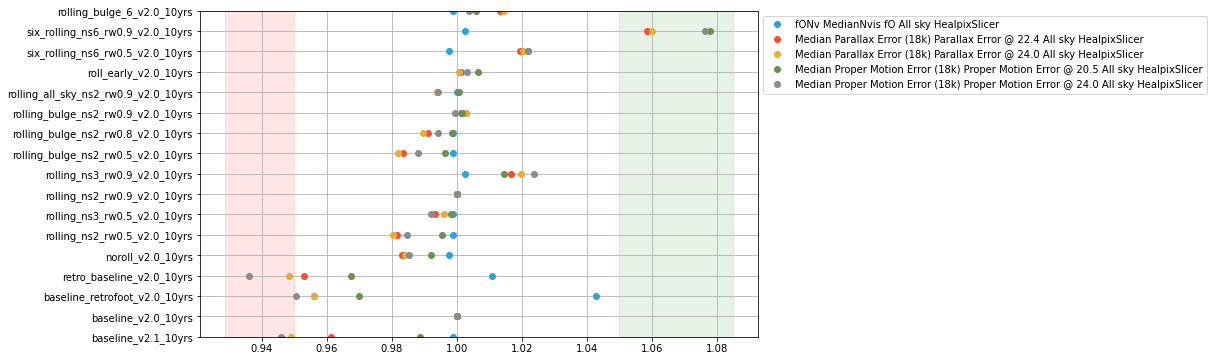

<IPython.core.display.Javascript object>

In [23]:
maf.plot_run_metric(
    summary,
    baseline_run=baseline_run,
)

The labels on this plot are long and precise, but can be hard to read or show in a small area. Shorter names for both runs and metrics are available in the `pandas.DataFrames` we have already downloaded, and we can build transformations from these `DataFrame`s.

In [24]:
metric_label_map = metric_sets.loc[this_metric_set, "short_name"]
metric_label_map

metric
fONv MedianNvis fO All sky HealpixSlicer                                                      fONv MedianNvis
Median Parallax Error (18k) Parallax Error @ 22.4 All sky HealpixSlicer              Med Parallax Error @22.4
Median Parallax Error (18k) Parallax Error @ 24.0 All sky HealpixSlicer              Med Parallax Error @24.0
Median Proper Motion Error (18k) Proper Motion Error @ 20.5 All sky HealpixSlicer          Med PM Error @20.5
Median Proper Motion Error (18k) Proper Motion Error @ 24.0 All sky HealpixSlicer          Med PM Error @24.0
Name: short_name, dtype: object

<IPython.core.display.Javascript object>

In [25]:
run_label_map = family_runs.loc[this_family, ["run", "brief"]].set_index("run")["brief"]
run_label_map

run
baseline_v2.1_10yrs                                   v2.1 baseline (+Virgo, good seeing)
baseline_v2.0_10yrs                                                         v2.0 baseline
baseline_retrofoot_v2.0_10yrs                    v1.x footprint but new code capabilities
retro_baseline_v2.0_10yrs               v1.x baseline with rubin_sim (without new code...
noroll_v2.0_10yrs                                           v2.0 baseline with no rolling
rolling_ns2_rw0.5_v2.0_10yrs                             Rolling half-sky (2 regions) 50%
rolling_ns3_rw0.5_v2.0_10yrs                            Rolling third-sky (3 regions) 50%
rolling_ns2_rw0.9_v2.0_10yrs                             Rolling half-sky (2 regions) 90%
rolling_ns3_rw0.9_v2.0_10yrs                            Rolling third-sky (3 regions) 90%
rolling_bulge_ns2_rw0.5_v2.0_10yrs                  Roll in the bulge with 2 regions, 50%
rolling_bulge_ns2_rw0.8_v2.0_10yrs                  Roll in the bulge with 2 regions, 80%
rollin

<IPython.core.display.Javascript object>

These can be passed to `plot_metric_summary` to replace the labels:
(note that using substitute names can obfuscate the run name, in particular -- was this v1.7 or v2.0, etc -- in ways that make tracking down the contents of plots later difficult)

(<Figure size 720x432 with 1 Axes>, <AxesSubplot:>)

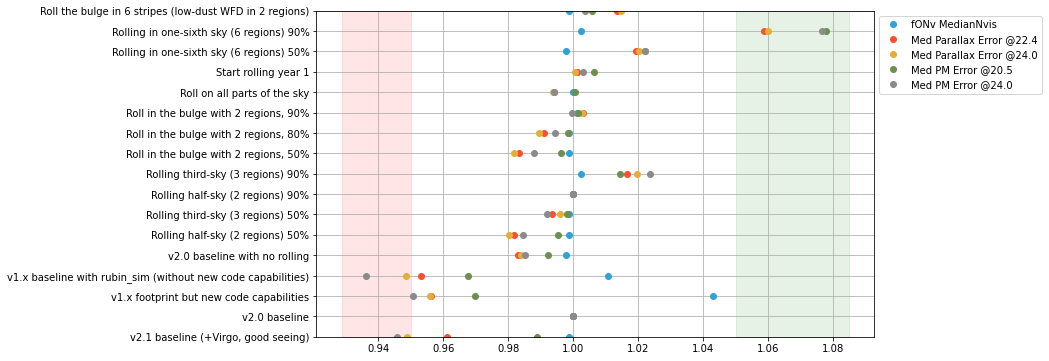

<IPython.core.display.Javascript object>

In [26]:
maf.plot_run_metric(
    summary,
    baseline_run=baseline_run,
    run_label_map=run_label_map,
    metric_label_map=metric_label_map,
)

The `vertical_quantity` and `horizontal_quantity` options will let you set which axis (horizontal, vertical, or color) is mapped to which quantity (run, metric name, metric value), and additional arguments set the color maps, markers, and line styles connecting the points:

(<Figure size 720x432 with 1 Axes>, <AxesSubplot:>)

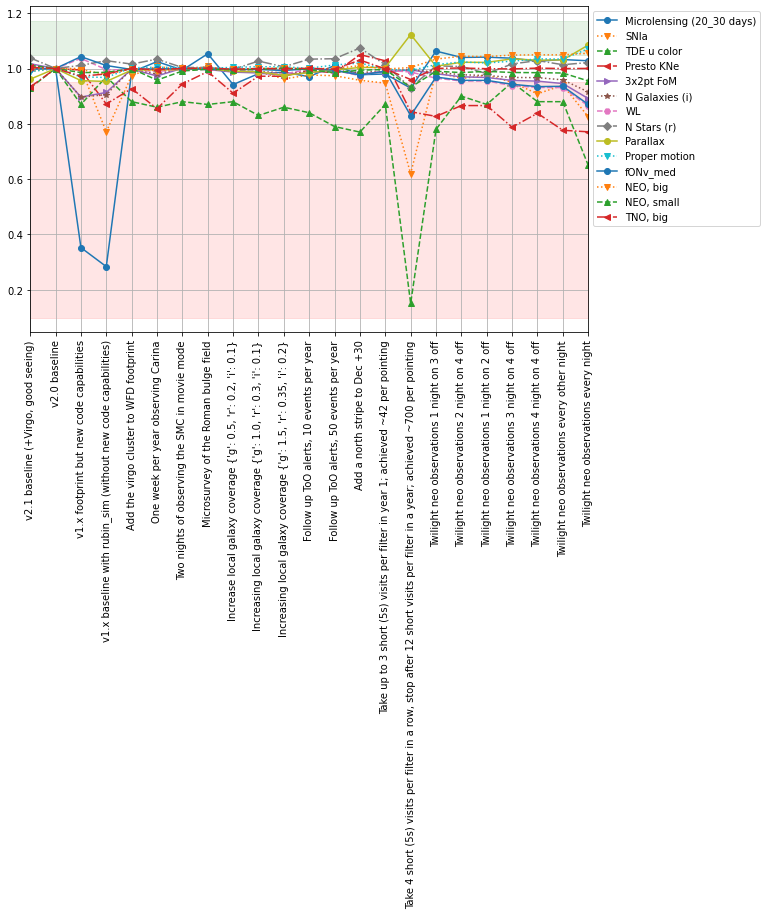

<IPython.core.display.Javascript object>

In [27]:
import matplotlib as mpl

this_metric_set = "radar"

this_family = ["baseline", "microsurveys"]
run_label_map = family_runs.loc[this_family, ["run", "brief"]].set_index("run")["brief"]
metric_label_map = metric_sets.loc[this_metric_set, "short_name"]

summary = archive.get_metric_summaries(this_family, this_metric_set)
metric_label_map = metric_sets.loc[this_metric_set, "short_name"]
maf.plot_run_metric(
    summary,
    baseline_run=baseline_run,
    vertical_quantity="value",
    horizontal_quantity="run",
    run_label_map=run_label_map,
    metric_label_map=metric_label_map,
    cmap=mpl.cm.tab10,
    linestyles=["-", ":", "--", "-."],
    markers=["o", "v", "^", "<", ">", "*", "H", "D"],
)

In [28]:
summary

metric,Total detected MicrolensingMetric_detect tE 20_30 days UserPointsSlicer,Total detected SNNSNMetric_nSN HealpixSlicer,Total detected TDEsPopMetric__some_color_pu UserPointsSlicer,Sum PrestoKNe__scoreS UserPointsSlicer,3x2ptFoM ExgalM5_with_cuts i band non-DD year 10 HealpixSlicer,N Galaxies (all) DepthLimitedNumGalaxiesMetric i band galaxies non-DD HealpixSlicer,Mean WeakLensingNvisits i band non-DD HealpixSlicer,"Total N Stars, crowding N stars to Precision 0.20 r HealpixSlicer",Median Parallax Uncert (18k) Parallax Uncert @ 22.4 HealpixSlicer,Median Proper Motion Uncert (18k) Proper Motion Uncert @ 20.5 HealpixSlicer,fONv MedianNvis fO All sky HealpixSlicer,3 pairs in 15 nights detection loss NEO H=16.0,3 pairs in 15 nights detection loss NEO H=22.0,3 pairs in 15 nights detection loss TNO H=6.0
run,,,,,,,,,,,,,,
baseline_v2.1_10yrs,3111.0,25120.276,93.0,167.0,38.560143,4.611300e+09,186.930985,2.710372e+09,2.329280,0.188435,838.0,0.9296,0.581853,0.699244
baseline_v2.0_10yrs,3116.0,25374.969,100.0,179.0,37.908126,4.568638e+09,185.960323,2.610228e+09,2.423048,0.190588,839.0,0.9296,0.575235,0.695976
baseline_retrofoot_v2.0_10yrs,1097.0,25380.501,87.0,178.0,33.991288,4.094741e+09,192.740070,2.640138e+09,2.316875,0.184832,875.0,0.9260,0.566718,0.676619
retro_baseline_v2.0_10yrs,883.0,19562.783,97.0,156.0,34.625891,4.138227e+09,185.200678,2.684094e+09,2.309433,0.184406,848.0,0.9094,0.567183,0.682227
virgo_cluster_v2.0_10yrs,3075.0,24726.586,88.0,166.0,37.818604,4.561217e+09,184.895629,2.651850e+09,2.409472,0.191103,836.0,0.9288,0.574944,0.696096
carina_v2.0_10yrs,3194.0,25594.465,86.0,153.0,36.886157,4.475945e+09,184.004866,2.698784e+09,2.411919,0.191445,838.0,0.9220,0.550987,0.693073
smc_movie_v2.0_10yrs,3098.0,25205.719,88.0,169.0,37.939982,4.576140e+09,185.370595,2.619385e+09,2.412430,0.191247,838.0,0.9298,0.570064,0.696093
roman_v2.0_10yrs,3282.0,25564.706,87.0,177.0,37.774065,4.557612e+09,185.265556,2.621022e+09,2.422213,0.190657,837.0,0.9302,0.573653,0.696890
local_gal_bindx0_v2.0_10yrs,2935.0,25127.518,88.0,163.0,37.413020,4.523588e+09,185.006744,2.602545e+09,2.398719,0.191418,837.0,0.9274,0.572572,0.694132


<IPython.core.display.Javascript object>

## 9 Mesh plots

Alternately, you can color code the metric value itself using `plot_run_metric_mesh`:

(<Figure size 432x432 with 2 Axes>, <AxesSubplot:>)

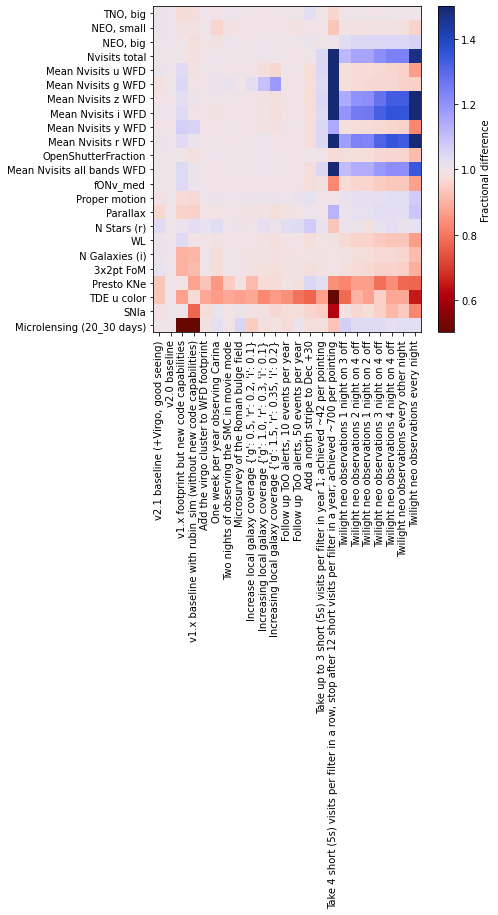

<IPython.core.display.Javascript object>

In [29]:
this_metric_set = ["N Visits", "radar"]
metric_label_map = metric_sets.loc[this_metric_set, "short_name"].droplevel(
    "metric set"
)

this_family = ["baseline", "microsurveys"]
run_label_map = family_runs.loc[this_family, ["run", "brief"]].set_index("run")["brief"]

summary = maf.get_metric_summaries(this_family, this_metric_set)

maf.plot_run_metric_mesh(
    summary,
    baseline_run=baseline_run,
    run_label_map=run_label_map,
    metric_label_map=metric_label_map,
)

## 10 Radar plots

Finally, if the numbers of runs and metrics are manageable, you can compare different metrics of different runs with a radar plot.

Let's select a modest collection of metrics and family of runs, and build a summary:

In [30]:
family_runs.loc[["baseline", "technical"], :]

,run,description,version,reference,brief,url,filepath
family,,,,,,,
baseline,baseline_v2.1_10yrs,**baseline** : The v2 baseline simulations. V2...,--,baseline_v2.1_10yrs,"v2.1 baseline (+Virgo, good seeing)",http://epyc.astro.washington.edu/~lynnej/opsim...,fbs_2.1/baseline/baseline_v2.1_10yrs.db
baseline,baseline_v2.0_10yrs,**baseline** : The v2 baseline simulations. V2...,--,baseline_v2.1_10yrs,v2.0 baseline,http://epyc.astro.washington.edu/~lynnej/opsim...,fbs_2.0/baseline/baseline_v2.0_10yrs.db
baseline,baseline_retrofoot_v2.0_10yrs,**baseline** : The v2 baseline simulations. V2...,--,baseline_v2.1_10yrs,v1.x footprint but new code capabilities,http://epyc.astro.washington.edu/~lynnej/opsim...,fbs_2.0/retro/baseline_retrofoot_v2.0_10yrs.db
baseline,retro_baseline_v2.0_10yrs,**baseline** : The v2 baseline simulations. V2...,--,baseline_v2.1_10yrs,v1.x baseline with rubin_sim (without new code...,http://epyc.astro.washington.edu/~lynnej/opsim...,fbs_2.0/retro/retro_baseline_v2.0_10yrs.db
technical,march_start_v2.1_10yrs,**technical** : This family is primarily aimed...,2.1,baseline_v2.1_10yrs,Start the survey in March 2022,http://epyc.astro.washington.edu/~lynnej/opsim...,fbs_2.1/technical/march_start/march_start_v2.1...


<IPython.core.display.Javascript object>

In [31]:
this_metric_set = "radar"
this_family = ["baseline", "technical"]
summary = maf.get_metric_summaries(this_family, this_metric_set)

<IPython.core.display.Javascript object>

The radar plot function requires that the data already be normalized, so normalize it:

In [32]:
norm_summary = maf.normalize_metric_summaries(baseline_run, summary)

<IPython.core.display.Javascript object>

The radar plot function takes the run and metric names from the `DataFrame` row and column names, so we can use short name by renaming the rows and columns:

In [33]:
metric_label_map = metric_sets.loc[this_metric_set, "short_name"]
run_label_map = family_runs.loc[this_family, ["run", "brief"]].set_index("run")["brief"]
norm_summary.rename(columns=run_label_map, index=metric_label_map, inplace=True)

<IPython.core.display.Javascript object>

Make the radar plot:

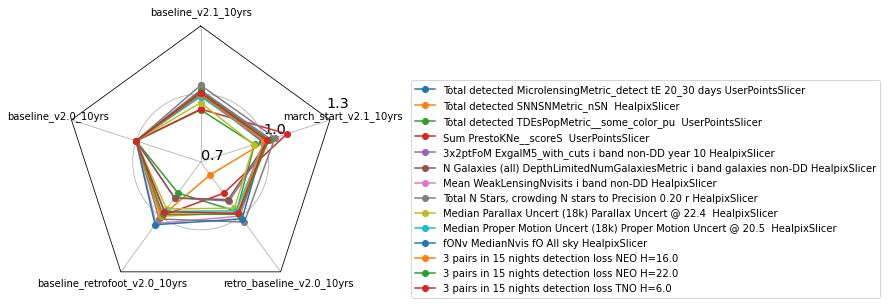

<IPython.core.display.Javascript object>

In [34]:
fig, ax = maf.radar(norm_summary.T, bbox_to_anchor=(3, 0), rgrids=[0.7, 1.0, 1.3])


## 11 Plotting yet more metrics and runs

Multiple sets of metrics and families of runs can be retrieved and plotted at once, and these can be supplemented by additional individual runs and metrics:

In [35]:
these_metric_sets = ["SRD", "WFD Depths", "radar"]
these_families = ["baseline", "triplets", "long gaps no pairs"]
extra_runs = [
    "noroll_v2.0_10yrs",
]
extra_metrics = [
    "Median Median Intra-Night Gap WFD HealpixSubsetSlicer",
]
summary = maf.get_metric_summaries(
    these_families, these_metric_sets, runs=extra_runs, metrics=extra_metrics
)

<IPython.core.display.Javascript object>

Because the slicing in pandas will return a multilevel index when multiple runs or families are sliced on, a little additional processing is needed to get a mapping from run or index name alone:

In [36]:
these_metrics = list(summary.columns)
metric_label_map = (
    metric_sets.loc[(slice(None), these_metrics), "short_name"]
    .groupby("metric")
    .first()
)
these_runs = list(summary.index)
run_label_map = (
    family_runs[["run", "brief"]]
    .set_index("run")
    .loc[these_runs, "brief"]
    .groupby("run")
    .first()
)

<IPython.core.display.Javascript object>

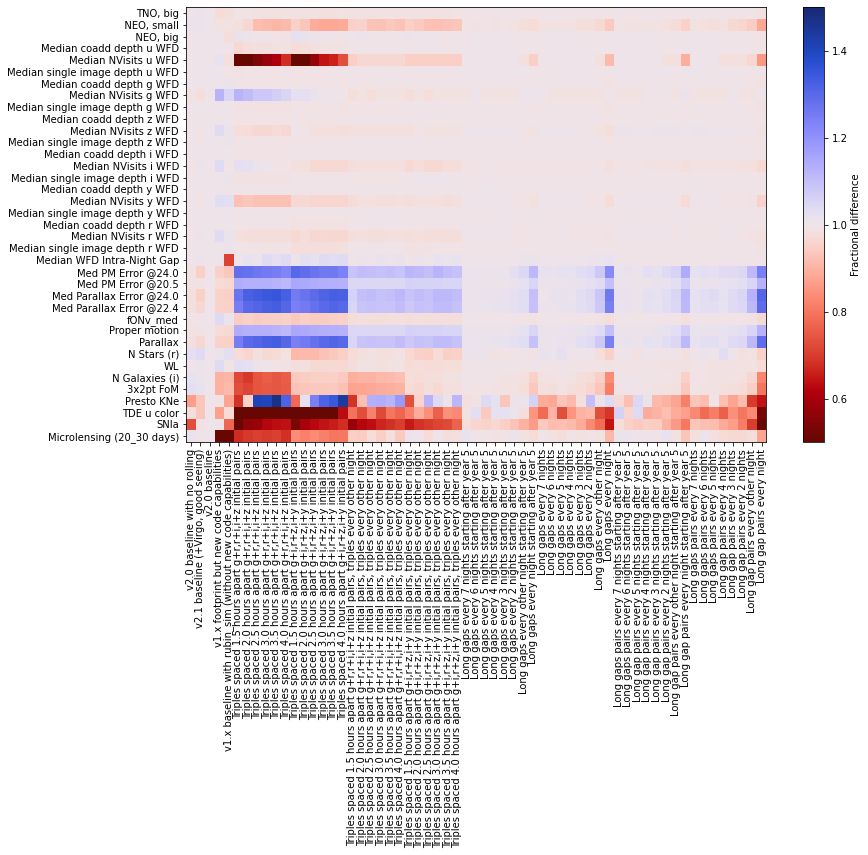

<IPython.core.display.Javascript object>

In [37]:
fig, ax = maf.plot_run_metric_mesh(
    summary,
    baseline_run=baseline_run,
    run_label_map=run_label_map,
    metric_label_map=metric_label_map,
)
fig.set_figwidth(13)
fig.set_figheight(8)

## 12 Plotting other metrics

Not all metrics present in the summary table have corresponding columns in the `metrics_set` data. 
If they do not, the MAF code does not know how to normalize these values (do they correspond to magnitudes? should they be inverted so that "bigger values are better" in the normalized plots?) and it's harder to deal with them.
For example, minimum WFD depth values have no normalization values:

In [38]:
min_depth_metrics = tuple(
    f"Min CoaddM5 WFD {b} band HealpixSubsetSlicer" for b in "ugrizy"
)
min_depth_metrics

('Min CoaddM5 WFD u band HealpixSubsetSlicer',
 'Min CoaddM5 WFD g band HealpixSubsetSlicer',
 'Min CoaddM5 WFD r band HealpixSubsetSlicer',
 'Min CoaddM5 WFD i band HealpixSubsetSlicer',
 'Min CoaddM5 WFD z band HealpixSubsetSlicer',
 'Min CoaddM5 WFD y band HealpixSubsetSlicer')

<IPython.core.display.Javascript object>

We can still load the un-normalied metric values:

In [39]:
summary = maf.get_metric_summaries(
    ["baseline", "bluer balance"], metrics=min_depth_metrics, metric_order="set"
)
summary

metric,Min CoaddM5 WFD u band HealpixSubsetSlicer,Min CoaddM5 WFD g band HealpixSubsetSlicer,Min CoaddM5 WFD r band HealpixSubsetSlicer,Min CoaddM5 WFD i band HealpixSubsetSlicer,Min CoaddM5 WFD z band HealpixSubsetSlicer,Min CoaddM5 WFD y band HealpixSubsetSlicer
run,,,,,,
baseline_v2.1_10yrs,25.093610,26.264803,26.411837,25.791297,25.071446,23.686803
baseline_v2.0_10yrs,25.196428,26.401892,26.438384,25.801749,25.120156,23.739837
baseline_retrofoot_v2.0_10yrs,25.523643,26.453339,26.597617,26.076968,25.324978,24.541196
retro_baseline_v2.0_10yrs,25.314226,26.548470,26.623485,26.045043,25.358114,24.537959
bluer_indx0_v2.0_10yrs,25.118566,26.502501,26.452352,25.805180,25.137013,23.657836
bluer_indx1_v2.0_10yrs,25.178282,26.452867,26.408266,25.804820,25.071340,23.770425


<IPython.core.display.Javascript object>

(21.0, 28.0)

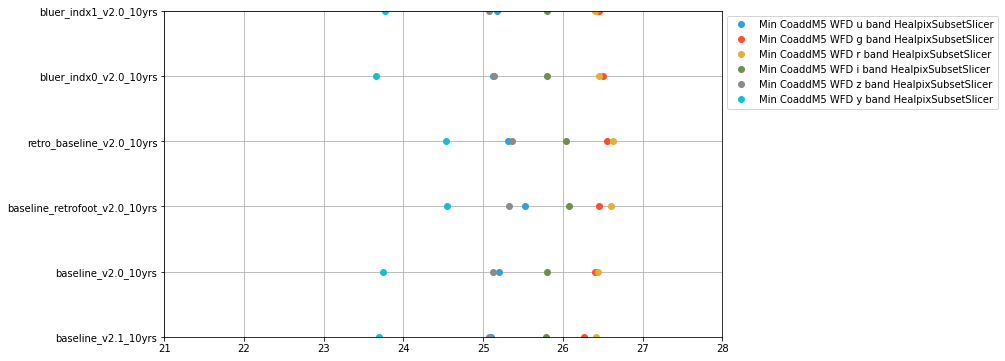

<IPython.core.display.Javascript object>

In [40]:
fig, ax = maf.plot_run_metric(summary, shade_fraction=None)
ax.set_xlim(21, 28)

If you want to properly normalize them, you can create you own metric_sets `DataFrame`:

In [41]:
mset = maf.create_metric_set_df(
    metric_set="min depth wfd",
    metrics=min_depth_metrics,
    short_name=[f"Min {b} band depth WFD" for b in "ugrizy"],
    style=["c-", "g-", "y-", "r-", "m-", "k-"],
    mag=True,
)
mset

metric  \
metric set    metric                                                                                   
min depth wfd Min CoaddM5 WFD u band HealpixSubsetSlicer  Min CoaddM5 WFD u band HealpixSubsetSlicer   
              Min CoaddM5 WFD g band HealpixSubsetSlicer  Min CoaddM5 WFD g band HealpixSubsetSlicer   
              Min CoaddM5 WFD r band HealpixSubsetSlicer  Min CoaddM5 WFD r band HealpixSubsetSlicer   
              Min CoaddM5 WFD i band HealpixSubsetSlicer  Min CoaddM5 WFD i band HealpixSubsetSlicer   
              Min CoaddM5 WFD z band HealpixSubsetSlicer  Min CoaddM5 WFD z band HealpixSubsetSlicer   
              Min CoaddM5 WFD y band HealpixSubsetSlicer  Min CoaddM5 WFD y band HealpixSubsetSlicer   

                                                                    short_name  \
metric set    metric                                                             
min depth wfd Min CoaddM5 WFD u band HealpixSubsetSlicer  Min u band depth WFD   
              Min CoaddM5 WFD g band HealpixSubsetSlicer  Min g band depth WFD   
              Min CoaddM5 WFD r band HealpixSubsetSlicer  Min r band depth WFD   
              Min CoaddM5 WFD i band HealpixSubsetSlicer  Min i band depth WFD   
              Min CoaddM5 WFD z band HealpixSubsetSlicer  Min z band depth WFD   
              Min CoaddM5 WFD y band HealpixSubsetSlicer  Min y band depth WFD   

                                                         style  invert   mag  
metric set    metric                                                          
min depth wfd Min CoaddM5 WFD u band HealpixSubsetSlicer    c-   False  True  
              Min CoaddM5 WFD g band HealpixSubsetSlicer    g-   False  True  
              Min CoaddM5 WFD r band HealpixSubsetSlicer    y-   False  True  
              Min CoaddM5 WFD i band HealpixSubsetSlicer    r-   False  True  
              Min CoaddM5 WFD z band HealpixSubsetSlicer    m-   False  True  
              Min CoaddM5 WFD y band HealpixSubsetSlicer    k-   False  True

<IPython.core.display.Javascript object>

(<Figure size 720x432 with 1 Axes>, <AxesSubplot:>)

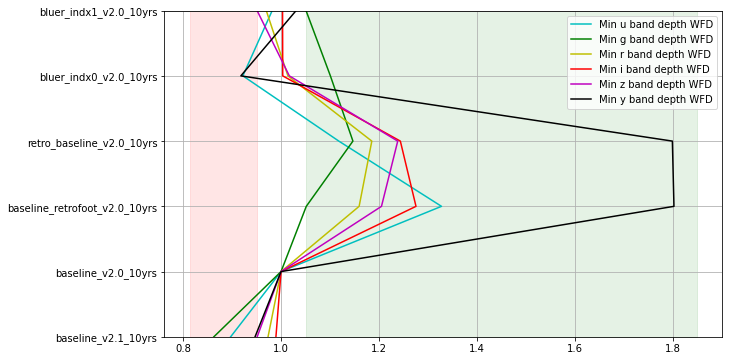

<IPython.core.display.Javascript object>

In [42]:
maf.plot_run_metric(
    summary,
    baseline_run=baseline_run,
    metric_label_map=mset.loc["min depth wfd"]["short_name"],
    metric_set=mset.loc["min depth wfd"],
)

## 13 Running additional MAF metrics

If the summary metrics are inadequate for what you need, you can download the opsim databases using URLs found in the `runs` `DataFrame` we downloaded above (using `get_runs`):

In [43]:
runs

,family,version,brief,filepath,url
run,,,,,
baseline_retrofoot_v2.0_10yrs,[baseline],[--],v1.x footprint but new code capabilities,fbs_2.0/retro/baseline_retrofoot_v2.0_10yrs.db,http://epyc.astro.washington.edu/~lynnej/opsim...
baseline_v2.0_10yrs,[baseline],[--],v2.0 baseline,fbs_2.0/baseline/baseline_v2.0_10yrs.db,http://epyc.astro.washington.edu/~lynnej/opsim...
baseline_v2.1_10yrs,[baseline],[--],"v2.1 baseline (+Virgo, good seeing)",fbs_2.1/baseline/baseline_v2.1_10yrs.db,http://epyc.astro.washington.edu/~lynnej/opsim...
bluer_indx0_v2.0_10yrs,[bluer balance],[2.0],"More g - filter ratio in WFD of {'u': 0.07, 'g...",fbs_2.0/bluer/bluer_indx0_v2.0_10yrs.db,http://epyc.astro.washington.edu/~lynnej/opsim...
bluer_indx1_v2.0_10yrs,[bluer balance],[2.0],More u and g - filter ratio in WFD of {'u': 0....,fbs_2.0/bluer/bluer_indx1_v2.0_10yrs.db,http://epyc.astro.washington.edu/~lynnej/opsim...
...,...,...,...,...,...
vary_nes_nesfrac0.50_v2.0_10yrs,[vary nes],[2.0],NES at 50% WFD level,fbs_2.0/vary_nes/vary_nes_nesfrac0.50_v2.0_10y...,http://epyc.astro.washington.edu/~lynnej/opsim...
vary_nes_nesfrac0.55_v2.0_10yrs,[vary nes],[2.0],NES at 55% WFD level,fbs_2.0/vary_nes/vary_nes_nesfrac0.55_v2.0_10y...,http://epyc.astro.washington.edu/~lynnej/opsim...
vary_nes_nesfrac0.75_v2.0_10yrs,[vary nes],[2.0],NES at 75% WFD level,fbs_2.0/vary_nes/vary_nes_nesfrac0.75_v2.0_10y...,http://epyc.astro.washington.edu/~lynnej/opsim...


<IPython.core.display.Javascript object>

You will need to specify a directory into which to download runs. To set where this notebook stores the run databases it downloads, uncomment the following cell and set the `out_dir` to your desired location:

In [44]:
# out_dir = '.'

<IPython.core.display.Javascript object>

For the purposes of this example, if you do not set the `out_dir`, this notebook creates a temporary directory (which will be deleted when the notebook process ends):

In [45]:
from tempfile import TemporaryDirectory
import os

try:
    print(f"Output directory for downloaded opsim run databases is set to {out_dir}.")
except NameError:
    temp_dir = TemporaryDirectory(dir=os.getcwd(), prefix="tmp_opsim_runs_")
    out_dir = temp_dir.name
    print(
        f"Temporary directory {out_dir} created for the storage of opsim databases downloaded by this notebook."
    )
    print("These will be deleted when this notebook is stopped or restarted!")

Temporary directory /Users/lynnej/lsst_repos/rubin_sim_notebooks/maf/tutorial/tmp_opsim_runs_2l3yng9_ created for the storage of opsim databases downloaded by this notebook.
These will be deleted when this notebook is stopped or restarted!


<IPython.core.display.Javascript object>

You also need to build a list of runs to download. One easy way is to select the runs that are part of a family, as present in the `family_runs` `DataFrame` we created with `get_family_runs` above:

In [46]:
my_runs = family_runs.loc[["baseline", "rolling"], "run"].tolist()
my_runs

['baseline_v2.1_10yrs',
 'baseline_v2.0_10yrs',
 'baseline_retrofoot_v2.0_10yrs',
 'retro_baseline_v2.0_10yrs',
 'noroll_v2.0_10yrs',
 'rolling_ns2_rw0.5_v2.0_10yrs',
 'rolling_ns3_rw0.5_v2.0_10yrs',
 'rolling_ns2_rw0.9_v2.0_10yrs',
 'rolling_ns3_rw0.9_v2.0_10yrs',
 'rolling_bulge_ns2_rw0.5_v2.0_10yrs',
 'rolling_bulge_ns2_rw0.8_v2.0_10yrs',
 'rolling_bulge_ns2_rw0.9_v2.0_10yrs',
 'rolling_all_sky_ns2_rw0.9_v2.0_10yrs',
 'roll_early_v2.0_10yrs',
 'six_rolling_ns6_rw0.5_v2.0_10yrs',
 'six_rolling_ns6_rw0.9_v2.0_10yrs',
 'rolling_bulge_6_v2.0_10yrs']

<IPython.core.display.Javascript object>

Now you can download the opsim output of interest into your runs directory:

In [ ]:
dest_fnames = maf.download_runs(my_runs, out_dir)
dest_fnames

Note that the return is a `pandas.Series` that maps run name to the file name it was downloaded into. You can now proceed to use these opsim database for your own MAF analysis.

In [ ]:
os.getcwd()

## 14 Putting it all together to explore a set of simulations

When exploring a new set of simulations (e.g. version 2.0), it can be useful to load the relevant family, run, and metric set `DataFrame`s, and define a single shorthand function to give everything you want on specific families.

For example, for the v2.0 runs, we let's get the relevant `DataFrames` and define such a function:

In [ ]:
url_base = "https://raw.githubusercontent.com/lsst-pst/survey_strategy/main/fbs_2.0/"
families = maf.get_family_descriptions(url_base + "runs_v2.1.json")
summary = maf.get_metric_summaries(summary_source=url_base + "summary_2022_04_28.csv")
metric_sets = maf.get_metric_sets(url_base + "metric_sets.json")

Grab a common baseline, using the baseline family:

In [ ]:
baseline_run = families.loc["baseline", "run"][0]
baseline_run

Make a mesh that shows all runs, and all metrics that are members of at least one metric set:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Include metrics from all metric sets (use the metric set so that we can invert appropriately)
# skip DD specific metrics
non_dd = [
    ms for ms in list(metric_sets.groupby("metric set").first().index) if not "DD" in ms
]
mset = (
    metric_sets.loc[non_dd]
    .reset_index(drop=True)
    .drop("style", axis=1)
    .drop("short_name", axis=1)
)
mset = mset.drop_duplicates().set_index("metric", drop=False, verify_integrity=True)

# Adjust the plot size so everything will fit without the labels overlapping
# Requires fiddling by hand.
fig, ax = plt.subplots(figsize=(30, 20))
maf.plot_run_metric_mesh(
    summary.loc[:, mset["metric"]],
    baseline_run=baseline_run,
    metric_set=mset,
    ax=ax,
)
fig.set_figheight(40)
fig.set_figwidth(15)